# Text Mining in North American Defense Documents

**Goal:** see the evolution of terms like "cyber security" in official documents. Since the greater presence of these terms may indicate greater attention from the US Congress to the topic

In [1]:
from PyPDF2 import PdfFileReader
import pandas as pd
from pathlib import Path
import os
import re
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load('en_core_web_lg')
stopwords = nlp.Defaults.stop_words

In [2]:
# Adicionar leitura de todos os parâmetros em arquivo de configuração



In [3]:
# Adicionar função que some palavras as stopwords



In [2]:
def read_pdf_file(filepath):
    pdf = open(filepath, "rb")
    reader = PdfFileReader(pdf, strict=False)
    number_of_pages = reader.numPages
    
    pages = []
    
    for i in range(number_of_pages):
        pages.append(reader.getPage(i).extractText())
        
    text = " ".join(pages)
    
    # Check if the document is empty
    if len(re.sub('\s+', ' ', text)) < 10:
        return False, ''
    
    return True, text

In [3]:
def read_all_files(local = Path('..','data')):
    
    files = os.listdir(local)
    year = []
    text = []
    
    for filename in files:
        is_valid, content = read_pdf_file(Path(local, filename))
        if is_valid:
            year.append(filename[:4])
            text.append(content)
    
    texts = pd.DataFrame(text, columns=['text'], index=year)
    
    texts.sort_index(inplace=True)
    
    return texts

In [4]:
all_texts = read_all_files()

In [5]:
all_texts

,text
2006,\n \n \n \nAnnual Threat Assessment \nof t...
2007,Annual Threat Assessment of the Director of...
2008,\n \nAnnual Threat Assessment of the Int...
2009,\n \nAnnual Threat Assessment of the Int...
2010,\n \n \nAnnual Threat Assessment of the US...
2012,\n \n \n \n Unclassified Statement for the Re...
2013,\n Statement for the Record \n Worldwide Th...
2014,\n \n Statement for the Record \n \nWorldwid...
2015,\n \nStatement for the Record \n \nWorldwide...
2016,Statement for the Record \n \nWorldwide Thre...


In [8]:
def clean_text(text):
    alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
    punctuation = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    lower = lambda x: x.lower()
    remove_br = lambda x: re.sub(r""" br """, ' ', x)
    remove_n = lambda x: re.sub(r""" [\r\n]+ """, ' ', x)
    line = lambda x: x.strip()
    linen =  lambda x: re.sub("\n","",x)
    only_letters_and_numbers = lambda x: re.sub('[^a-zA-z0-9\s]','', x)
    double_spaces = lambda x: re.sub('\s+', ' ', x)
    
    text = alphanumeric(text)
    text = punctuation(text)
    text = lower(text)
    text = remove_br(text)
    text = remove_n(text)
    text = line(text)
    text = linen(text)
    text = only_letters_and_numbers(text)
    text = double_spaces(text)
    
    
    return text

In [9]:
all_texts['cleaned_text'] = all_texts.text.apply(clean_text)

In [10]:
all_texts

,text,cleaned_text
2006,\n \n \n \nAnnual Threat Assessment \nof t...,annual threat assessment of the director of na...
2007,Annual Threat Assessment of the Director of...,annual threat assessment of the director of na...
2008,\n \nAnnual Threat Assessment of the Int...,annual threat assessment of the intelligence c...
2009,\n \nAnnual Threat Assessment of the Int...,annual threat assessment of the intelligence c...
2010,\n \n \nAnnual Threat Assessment of the US...,annual threat assessment of the us intelligenc...
2012,\n \n \n \n Unclassified Statement for the Re...,unclassified statement for the record on the w...
2013,\n Statement for the Record \n Worldwide Th...,statement for the record worldwide threat asse...
2014,\n \n Statement for the Record \n \nWorldwid...,statement for the record worldwide threat asse...
2015,\n \nStatement for the Record \n \nWorldwide...,statement for the record worldwide threat asse...
2016,Statement for the Record \n \nWorldwide Thre...,statement for the record worldwide threat asse...


In [11]:
def remove_stopwords(text, stopwords):
    text_with_stopwords = [token for token in text.split() if token not in stopwords]
    
    return ' '.join(text_with_stopwords)

In [12]:
all_texts['cleaned_text_without_stopword'] = all_texts['cleaned_text'].apply(lambda x: remove_stopwords(x, stopwords))

In [13]:
all_texts

,text,cleaned_text,cleaned_text_without_stopword
2006,\n \n \n \nAnnual Threat Assessment \nof t...,annual threat assessment of the director of na...,annual threat assessment director national int...
2007,Annual Threat Assessment of the Director of...,annual threat assessment of the director of na...,annual threat assessment director national int...
2008,\n \nAnnual Threat Assessment of the Int...,annual threat assessment of the intelligence c...,annual threat assessment intelligence communit...
2009,\n \nAnnual Threat Assessment of the Int...,annual threat assessment of the intelligence c...,annual threat assessment intelligence communit...
2010,\n \n \nAnnual Threat Assessment of the US...,annual threat assessment of the us intelligenc...,annual threat assessment intelligence communit...
2012,\n \n \n \n Unclassified Statement for the Re...,unclassified statement for the record on the w...,unclassified statement record worldwide threat...
2013,\n Statement for the Record \n Worldwide Th...,statement for the record worldwide threat asse...,statement record worldwide threat assessment i...
2014,\n \n Statement for the Record \n \nWorldwid...,statement for the record worldwide threat asse...,statement record worldwide threat assessment i...
2015,\n \nStatement for the Record \n \nWorldwide...,statement for the record worldwide threat asse...,statement record worldwide threat assessment i...
2016,Statement for the Record \n \nWorldwide Thre...,statement for the record worldwide threat asse...,statement record worldwide threat assessment i...


In [14]:
# lemma



In [15]:
# Adicionar dicionário de palavras que transforma certas palavras que deveriam ser iguais, mas não constam em gramática, 
# ex: al qaidas -> al qaida

In [16]:
def get_top_n_grams(corpus, stopwords, n_gram=[1,1]):
    vec = CountVectorizer(ngram_range=(n_gram[0], n_gram[1]), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return dict(words_freq)

def plot_top_n_grams(corpus: dict, top_n_grams: int = 30):
    plt.figure(figsize = (16,9))
    sns.barplot(x=list(corpus.values())[:top_n_grams],y=list(corpus.keys())[:top_n_grams])
    plt.title(f'Top {top_n_grams} most common ngrams')

    plt.show()
    
def plot_wordcloud(corpus: dict):
    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).fit_words(corpus)
    plt.imshow(wc , interpolation = 'bilinear')
    
    plt.show()

In [18]:
most_common_1_gram = get_top_n_grams(all_texts['cleaned_text_without_stopword'], stopwords, n_gram=[1,1])
most_common_2_gram = get_top_n_grams(all_texts['cleaned_text_without_stopword'], stopwords, n_gram=[2,2])

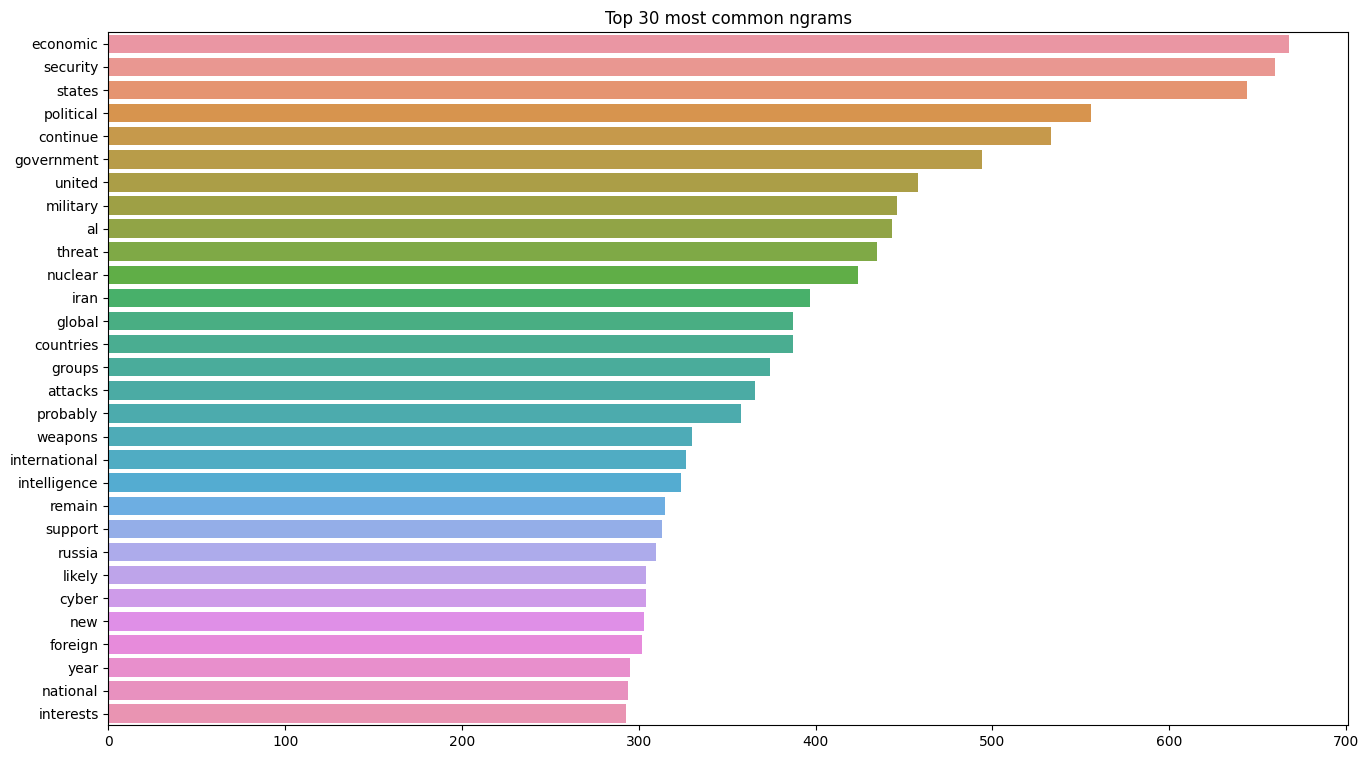

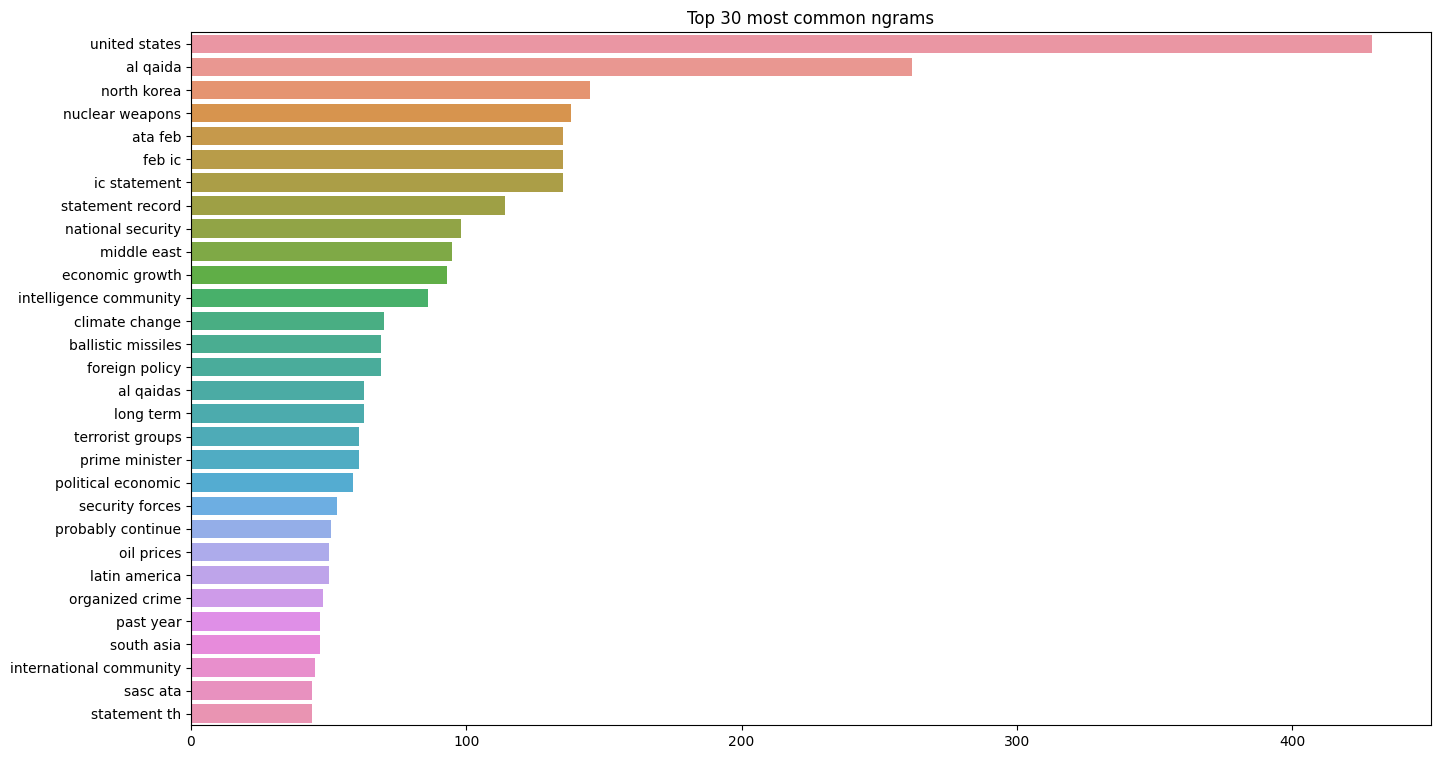

In [19]:
plot_top_n_grams(most_common_1_gram)
plot_top_n_grams(most_common_2_gram)

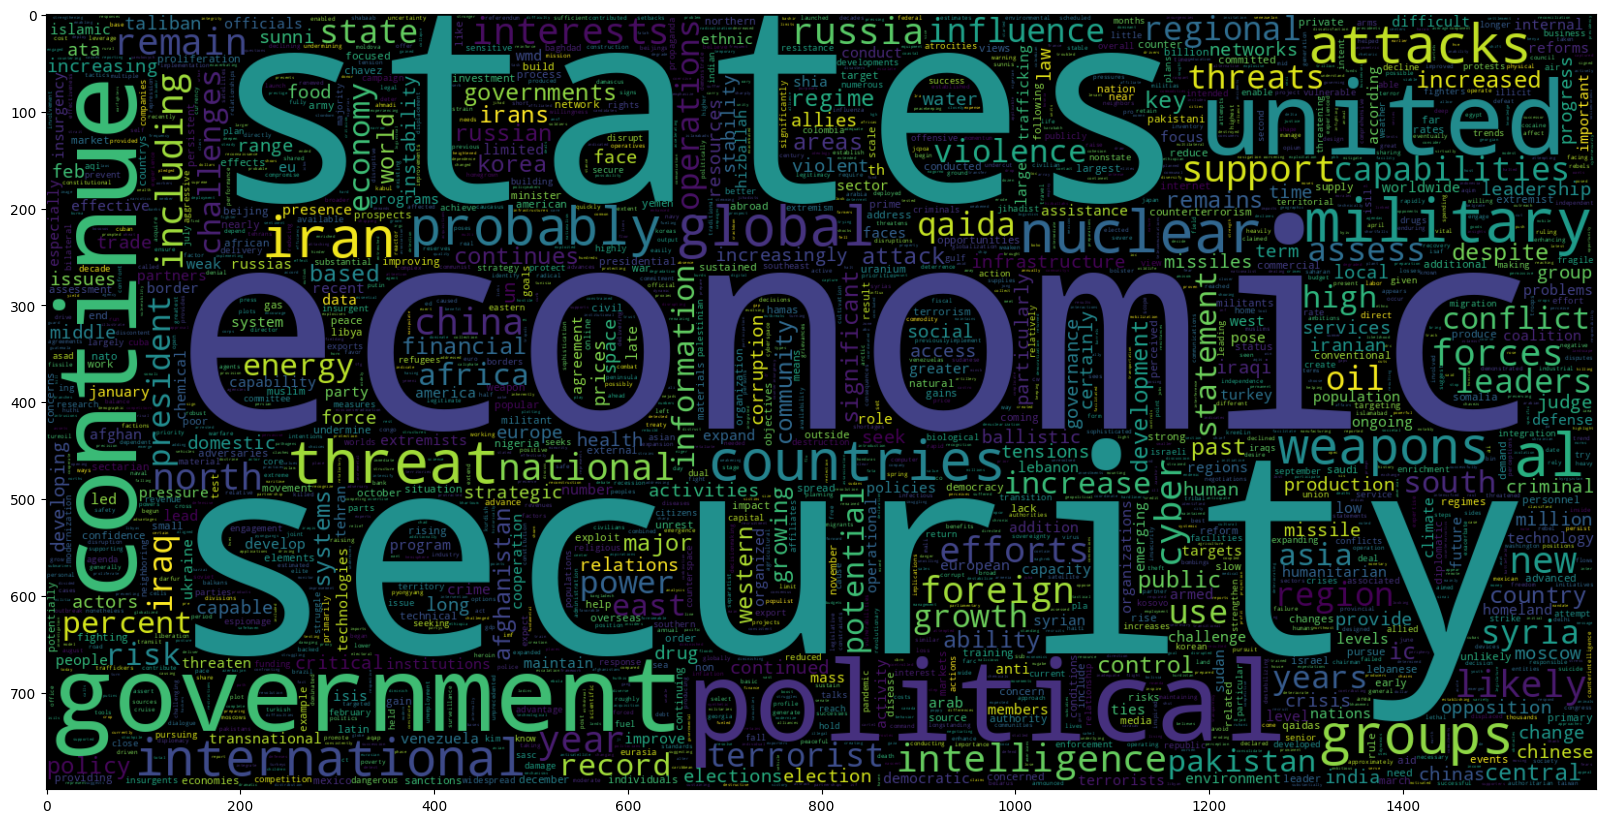

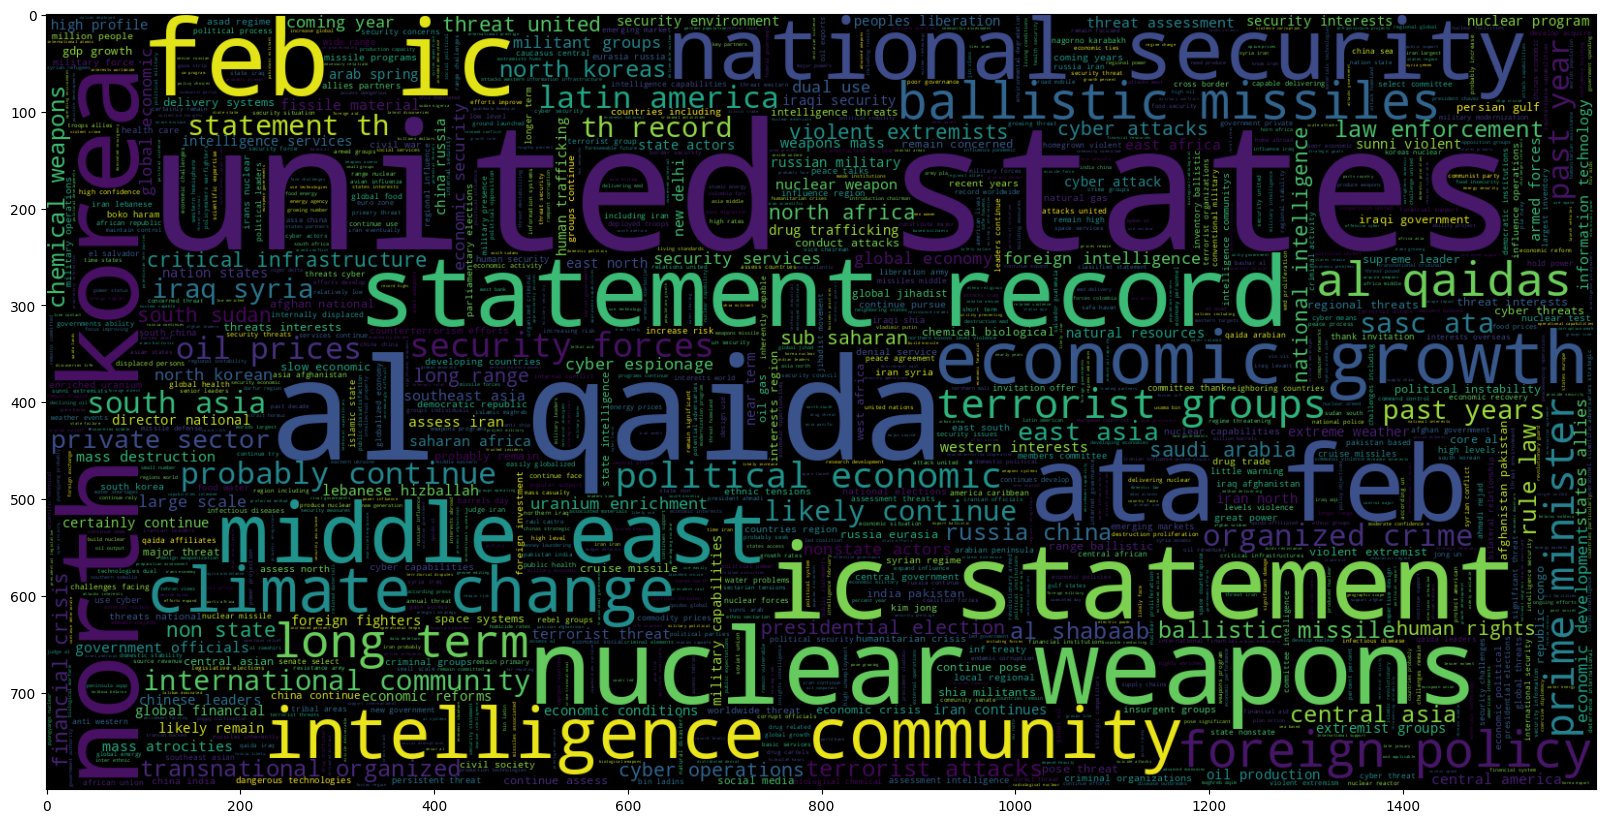

In [20]:
plot_wordcloud(most_common_1_gram)
plot_wordcloud(most_common_2_gram)

## Escrever bem
Podemos ver aqui já alguns assuntos que aparecem com frequência

In [21]:
themes = {
    'Cyber Security': ['cyber', 'cybersecurity', 'cybercrime'],
    'Nuclear': ['nuclear', 'ballistic missiles'],
    'North Korea': ['north korea', 'kim jong un'],
    'Terrorism': ['al qaida', 'bin laden', 'jihadist']
}

In [26]:
def search_for_themes(corpus, themes, stopwords) -> dict:
    result = {}
    frequency_by_year = {}
    for year in corpus.index:
        print(f'Searching year: {year}')
        frequency_by_year[year] = get_top_n_grams([corpus.loc[year]], stopwords, n_gram=[1,2])
        result[year] = {}
        for theme in themes:
            result[year][theme] = 0
            result[year]['Total'] = Counter(frequency_by_year[year]).total()
            for words in themes[theme]:
                result[year][theme] += Counter(frequency_by_year[year]).get(words, 0)
    
    return result

def plot_analysis(search_result, plot_type='line', count_type='percentage'):
    '''
    search_result: Output from search_for_themes function
    plot_type: "bar" or "line"
    count_type: "percentage" or "absolute"
    '''
    
    data_to_plot = pd.DataFrame(search_result).T
    
    plt.figure(figsize=(12,8))
    
    if count_type == 'percentage':
        for i, column in enumerate(data_to_plot.drop('Total', axis=1).columns):
            if plot_type == 'line':
                plt.plot(data_to_plot.index, data_to_plot[column]/data_to_plot['Total'], label=column)
            elif plot_type == 'bar':
                plt.bar(data_to_plot.index.to_numpy(dtype=float) + float(i)/5 - 1/5, 
                        data_to_plot[column]/data_to_plot['Total'], 
                        width=0.2,
                        label=column)
            
    elif count_type=='absolute':
        for column in data_to_plot.drop('Total', axis=1).columns:
            plt.plot(data_to_plot.index, data_to_plot[column], label=column)
    plt.grid()
    plt.legend()
    plt.show()

In [27]:
results=search_for_themes(all_texts['cleaned_text_without_stopword'], themes, stopwords)

Searching year: 2006
Searching year: 2007
Searching year: 2008
Searching year: 2009
Searching year: 2010
Searching year: 2012
Searching year: 2013
Searching year: 2014
Searching year: 2015
Searching year: 2016
Searching year: 2017
Searching year: 2018
Searching year: 2019


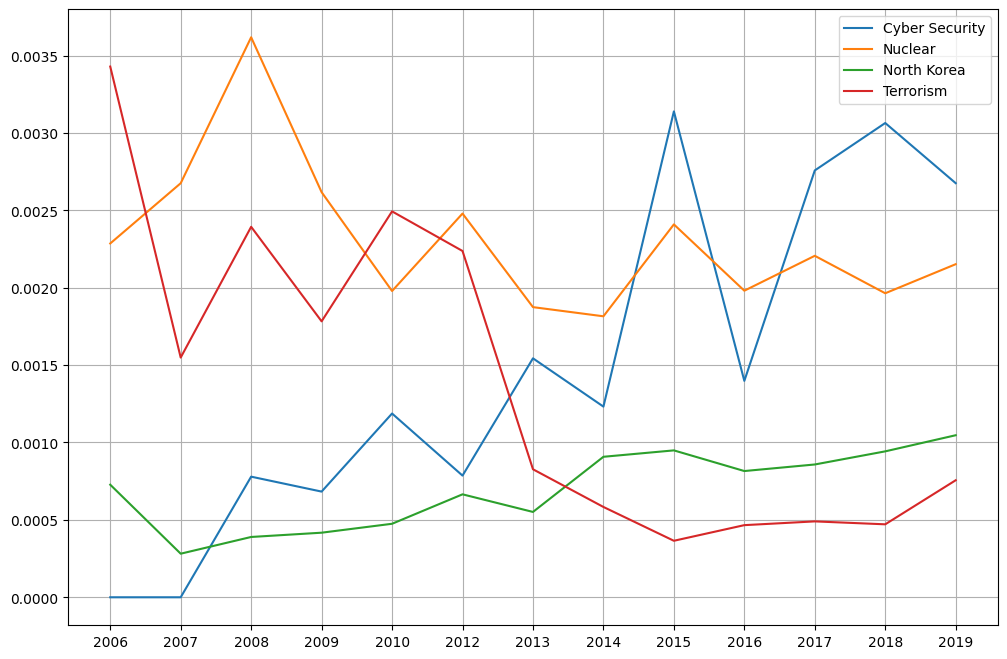

In [28]:
plot_analysis(results)